<a href="https://colab.research.google.com/github/DataAndSmores/Portfolio/blob/main/Missing_Diabetes_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preface

**Goal:**The goal of this project is to better understand the challange of missing data. 

We will exmaine four models

**Model One:** Trained with full data and tested with full data at a 70/30 split.

**Model Two:** Trained with full data and tested with missing data at an 100/100 split.

**Model Three:** Trained with missing data and tested with missing data at a 70/30 split.

**Model Four:** Trained with missing data and tested with full data at an 100/100 split.

**About the data:** The data was obtained from the diabetes dataset avaible on Kaggle as of 2022/11/27. The data was obtained from the United Sttes National Institute of Diabetes and Digestive and Kidney Diseases. The dataset contains information on female patients of Pima Native heritage, all at least 21 years old.

**Features** The features of the data are as follows:

**Pregnancies:** Number of times pregnant

**Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test

**BloodPressure:** Diastolic blood pressure (mm Hg)

**SkinThickness:** Triceps skin fold thickness (mm)

**Insulin:** 2-Hour serum insulin (mu U/ml)

**BMI:** Body mass index (weight in kg/(height in m)^2)

**DiabetesPedigreeFunction:** Diabetes pedigree function

**Age:** Age (years)

**Outcome:** Class variable (0 or 1)





# Part One: Preprocessing

In [ ]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels as sm


#Machine Learning Libraries

In [ ]:
#Read in the data
original_data = pd.read_csv("/content/drive/MyDrive/CSVs/diabetes.csv")
original_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#Create the dataframes 
#There are more efficient ways to create the dataframes used in this project
#However, creating creating dataframes in this fashion will improve data safety

#This data will be used for creating the data-frame without missing data.
data_frame = pd.read_csv("/content/drive/MyDrive/CSVs/diabetes.csv")

#This data will be used for creating the data-frame with missing data.
missing_data_frame = pd.read_csv("/content/drive/MyDrive/CSVs/diabetes.csv")
missing_data_frame['ID'] = missing_data_frame.groupby(missing_data_frame.columns.tolist(), sort=False).ngroup() + 1

In [ ]:
#This creates the data frame with no missing data
data_frame = data_frame[(data_frame[["Glucose","BloodPressure", "SkinThickness","Insulin", "BMI"]] != 0).all(axis=1)]
data_frame.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#This confirms that all missing data was removed from the above dataframe
data_frame.info()
data_frame.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    int64  
 2   BloodPressure             392 non-null    int64  
 3   SkinThickness             392 non-null    int64  
 4   Insulin                   392 non-null    int64  
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 30.6 KB


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#missing_data_frame['ID'] = missing_data_frame.groupby(missing_data_frame.columns.tolist(), sort=False).ngroup() + 1
missing_data_frame.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,ID
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958,384.500000
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951,221.846794
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,1.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,192.750000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,384.500000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,576.250000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,768.000000


In [ ]:
m1 = missing_data_frame[(missing_data_frame[["Glucose"]] == 0).all(axis=1)]
m2 = missing_data_frame[(missing_data_frame[["BloodPressure"]] == 0).all(axis=1)]
m3 = missing_data_frame[(missing_data_frame[["SkinThickness"]] == 0).all(axis=1)]
m4 = missing_data_frame[(missing_data_frame[["Insulin"]] == 0).all(axis=1)]
m5 = missing_data_frame[(missing_data_frame[["BMI"]] == 0).all(axis=1)]

In [ ]:
#Verification that this sub-dataframe only includes rows without Glucose
m1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,ID
count,5.00000,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000
mean,2.80000,0.0,67.600000,29.600000,4.600000,32.880000,0.380200,28.600000,0.400000,291.00000
std,2.48998,0.0,12.033287,9.343447,10.285913,7.033989,0.215527,9.607289,0.547723,165.08937
min,1.00000,0.0,48.000000,20.000000,0.000000,24.700000,0.140000,21.000000,0.000000,76.00000
25%,1.00000,0.0,68.000000,20.000000,0.000000,27.700000,0.299000,22.000000,0.000000,183.00000
50%,1.00000,0.0,68.000000,32.000000,0.000000,32.000000,0.346000,22.000000,0.000000,343.00000
75%,5.00000,0.0,74.000000,35.000000,0.000000,39.000000,0.389000,37.000000,1.000000,350.00000
max,6.00000,0.0,80.000000,41.000000,23.000000,41.000000,0.727000,41.000000,1.000000,503.00000


In [ ]:
#Verification that this sub-dataframe only includes rows without BloodPressure
m2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,ID
count,35.000000,35.000000,35.0,35.000000,35.0,35.000000,35.000000,35.000000,35.000000,35.000000
mean,3.628571,117.800000,0.0,1.514286,0.0,25.705714,0.388429,30.714286,0.457143,380.628571
std,3.646801,27.488821,0.0,6.298326,0.0,14.874553,0.254266,9.820661,0.505433,210.884285
min,0.000000,73.000000,0.0,0.000000,0.0,0.000000,0.102000,21.000000,0.000000,8.000000
25%,0.000000,97.500000,0.0,0.000000,0.0,21.650000,0.197500,24.500000,0.000000,242.500000
50%,2.000000,117.000000,0.0,0.000000,0.0,28.900000,0.282000,28.000000,0.000000,427.000000
75%,6.000000,133.500000,0.0,0.000000,0.0,34.550000,0.573500,34.000000,1.000000,535.000000
max,13.000000,183.000000,0.0,30.000000,0.0,52.300000,0.933000,72.000000,1.000000,707.000000


In [ ]:
#Verification that this sub-dataframe only includes rows without SkinThickness
m3.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,ID
count,227.000000,227.000000,227.000000,227.0,227.0,227.000000,227.000000,227.000000,227.000000,227.000000
mean,4.638767,123.449339,64.118943,0.0,0.0,30.129956,0.393291,37.251101,0.387665,380.867841
std,3.350062,29.572931,28.839945,0.0,0.0,9.168249,0.276871,13.062933,0.488294,229.241285
min,0.000000,44.000000,0.000000,0.0,0.0,0.000000,0.078000,21.000000,0.000000,3.000000
25%,2.000000,105.000000,62.000000,0.0,0.0,25.150000,0.203000,27.000000,0.000000,179.500000
50%,4.000000,120.000000,72.000000,0.0,0.0,30.400000,0.282000,34.000000,0.000000,379.000000
75%,7.000000,140.500000,80.000000,0.0,0.0,35.050000,0.536500,45.000000,1.000000,587.500000
max,13.000000,197.000000,122.000000,0.0,0.0,52.900000,1.781000,72.000000,1.000000,767.000000


In [ ]:
#Verification that this sub-dataframe only includes rows without Insulin	
m4.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,ID
count,374.000000,374.000000,374.000000,374.000000,374.0,374.000000,374.000000,374.000000,374.000000,374.000000
mean,4.433155,119.409091,67.473262,11.508021,0.0,30.943316,0.415340,35.796791,0.368984,381.310160
std,3.437621,32.544233,24.522312,15.738605,0.0,8.419854,0.300547,12.729034,0.483176,228.374499
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.078000,21.000000,0.000000,1.000000
25%,1.000000,99.250000,64.000000,0.000000,0.0,26.500000,0.209000,25.000000,0.000000,181.750000
50%,4.000000,115.000000,72.000000,0.000000,0.0,31.200000,0.302500,32.000000,0.000000,384.500000
75%,7.000000,138.000000,80.000000,26.750000,0.0,35.675000,0.553250,43.000000,1.000000,583.750000
max,14.000000,199.000000,122.000000,99.000000,0.0,52.900000,1.893000,72.000000,1.000000,768.000000


In [ ]:
#Verification that this sub-dataframe only includes rows without BMI
m5.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,ID
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.0,11.000000,11.000000,11.000000,11.000000
mean,3.909091,104.272727,28.818182,4.181818,8.090909,0.0,0.433273,30.454545,0.181818,323.454545
std,3.505839,19.652435,40.651736,9.303958,26.834510,0.0,0.460162,15.945931,0.404520,263.030555
min,0.000000,74.000000,0.000000,0.000000,0.000000,0.0,0.102000,21.000000,0.000000,10.000000
25%,1.000000,89.000000,0.000000,0.000000,0.000000,0.0,0.210500,21.500000,0.000000,71.500000
50%,3.000000,105.000000,0.000000,0.000000,0.000000,0.0,0.261000,24.000000,0.000000,372.000000
75%,6.500000,116.500000,69.500000,0.000000,0.000000,0.0,0.438500,28.000000,0.000000,509.000000
max,10.000000,136.000000,96.000000,23.000000,89.000000,0.0,1.731000,69.000000,1.000000,707.000000


In [ ]:
df_row_reindex = pd.concat([m1, m2], ignore_index=True)
#df_row_reindex

df_row_reindex = pd.concat([df_row_reindex, m3], ignore_index=True)
#df_row_reindex

df_row_reindex = pd.concat([df_row_reindex, m4], ignore_index=True)
#df_row_reindex

df_row_reindex = pd.concat([df_row_reindex, m5], ignore_index=True)
df_row_reindex


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,ID
0,1,0,48,20,0,24.7,0.140,22,0,76
1,1,0,74,20,23,27.7,0.299,21,0,183
2,1,0,68,35,0,32.0,0.389,22,0,343
3,5,0,80,32,0,41.0,0.346,37,1,350
4,6,0,68,41,0,39.0,0.727,41,1,503
...,...,...,...,...,...,...,...,...,...,...
647,0,94,0,0,0,0.0,0.256,25,0,427
648,3,80,0,0,0,0.0,0.174,22,0,495
649,6,114,0,0,0,0.0,0.189,26,0,523
650,5,136,82,0,0,0.0,0.640,69,0,685


In [ ]:
df_row_reindex = df_row_reindex.drop_duplicates(subset=["ID"])

In [ ]:
#This dataframe contains of all rows with at least one datapoint of missing data
missing_data_frame = df_row_reindex
missing_data_frame = missing_data_frame[["Pregnancies", "Glucose","BloodPressure", "SkinThickness","Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,0,48,20,0,24.7,0.140,22,0
1,1,0,74,20,23,27.7,0.299,21,0
2,1,0,68,35,0,32.0,0.389,22,0
3,5,0,80,32,0,41.0,0.346,37,1
4,6,0,68,41,0,39.0,0.727,41,1
...,...,...,...,...,...,...,...,...,...
632,7,137,90,41,0,32.0,0.391,39,0
636,9,170,74,31,0,44.0,0.403,43,1
638,2,122,70,27,0,36.8,0.340,27,0
640,1,93,70,31,0,30.4,0.315,23,0


#Part Two: Visualisation

In [ ]:
#This data needs to be normalized.
#Normalizing tranformers all data points to be between 0-1
#MaxAbsScaler keeps 0's at 0


#Normalizing the Full Dataframe 
from sklearn import preprocessing
scaler = preprocessing.MaxAbsScaler() #The MaxAbsScaler...
data_frame = pd.DataFrame(scaler.fit_transform(data_frame), columns=data_frame.columns, index=data_frame.index) 


#Normalizing the Missing Dataframe
from sklearn import preprocessing
scaler = preprocessing.MaxAbsScaler() #The MaxAbsScaler...
missing_data_frame = pd.DataFrame(scaler.fit_transform(missing_data_frame), columns=missing_data_frame.columns, index=missing_data_frame.index) 



The plot below illustrates our challange, there is no clear predictor (feature) that will tell us if someone has diabetes.

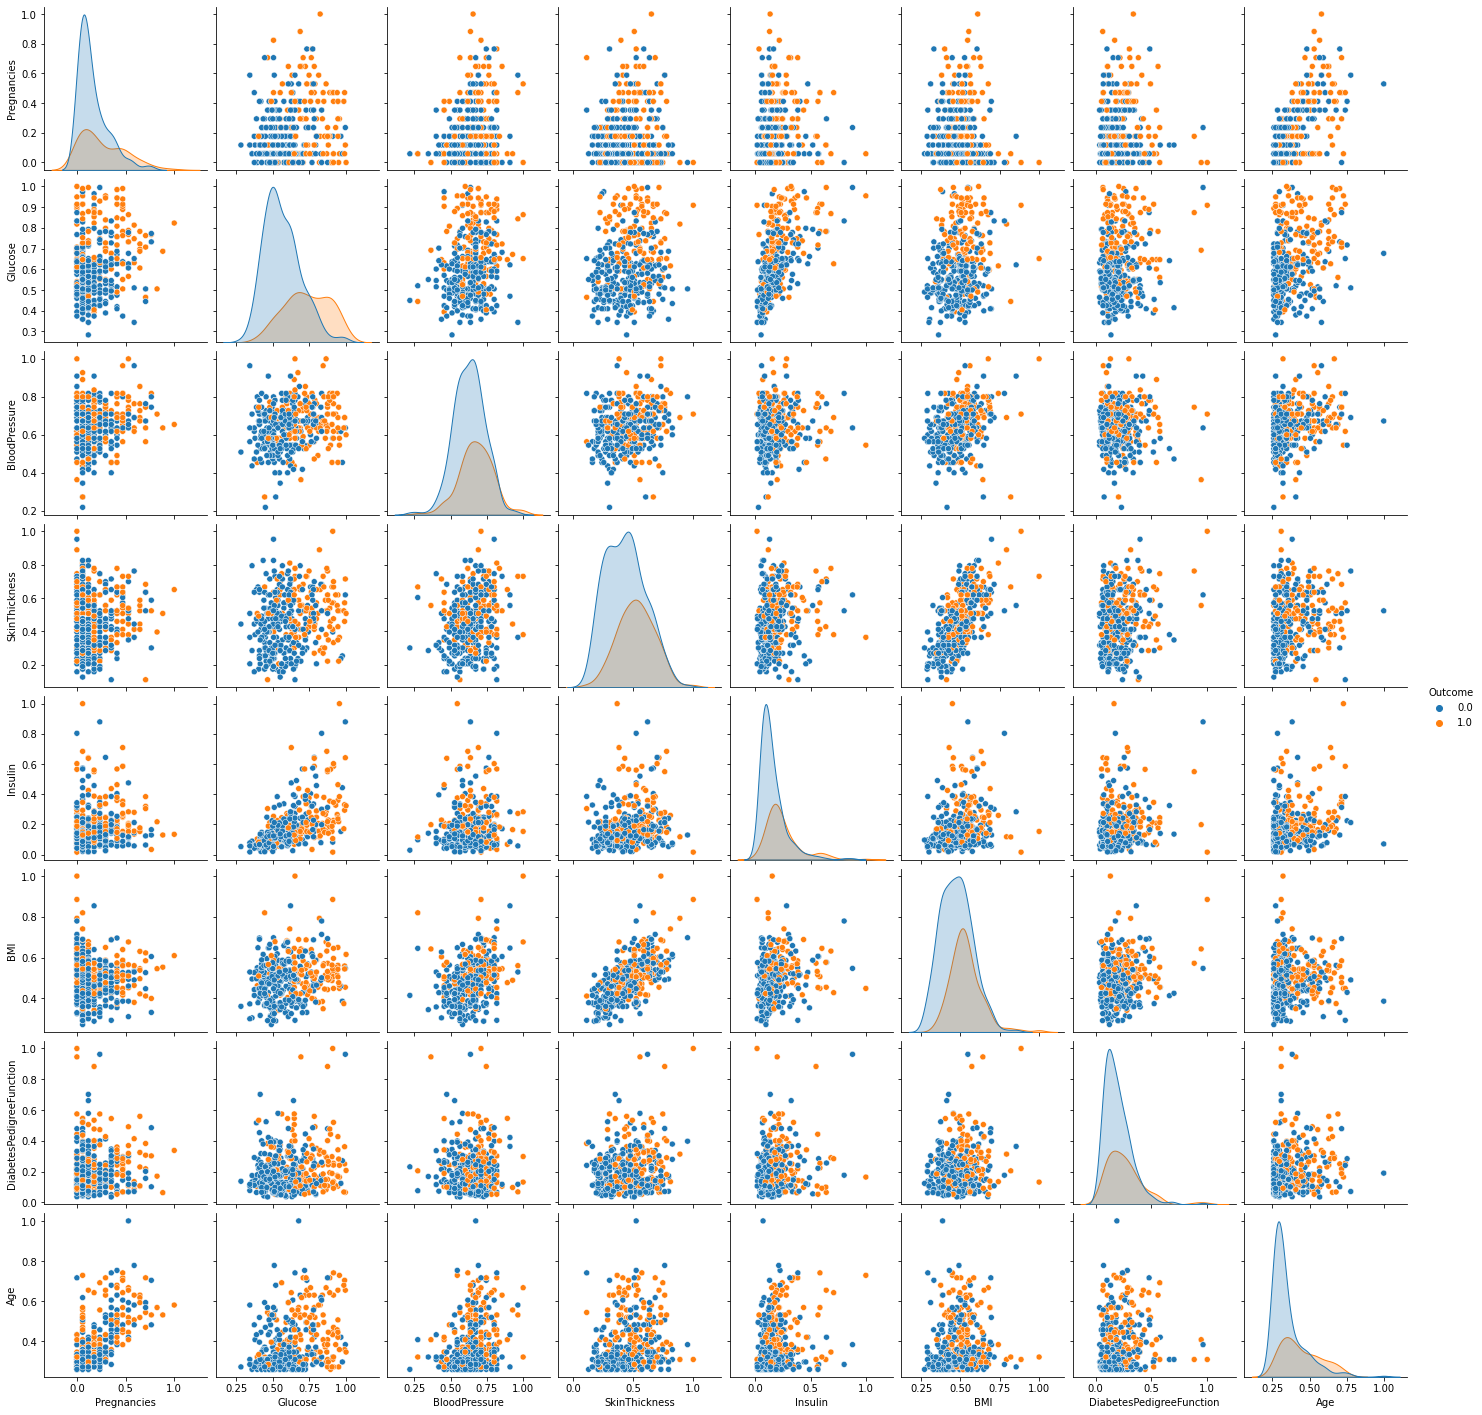

In [ ]:
#Pairplot
#Full Dataframe 
sns.pairplot(data_frame, hue="Outcome", vars=["Pregnancies","Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction","Age"])
plt.show()

The pairplot for the missing data only clouds the picture.

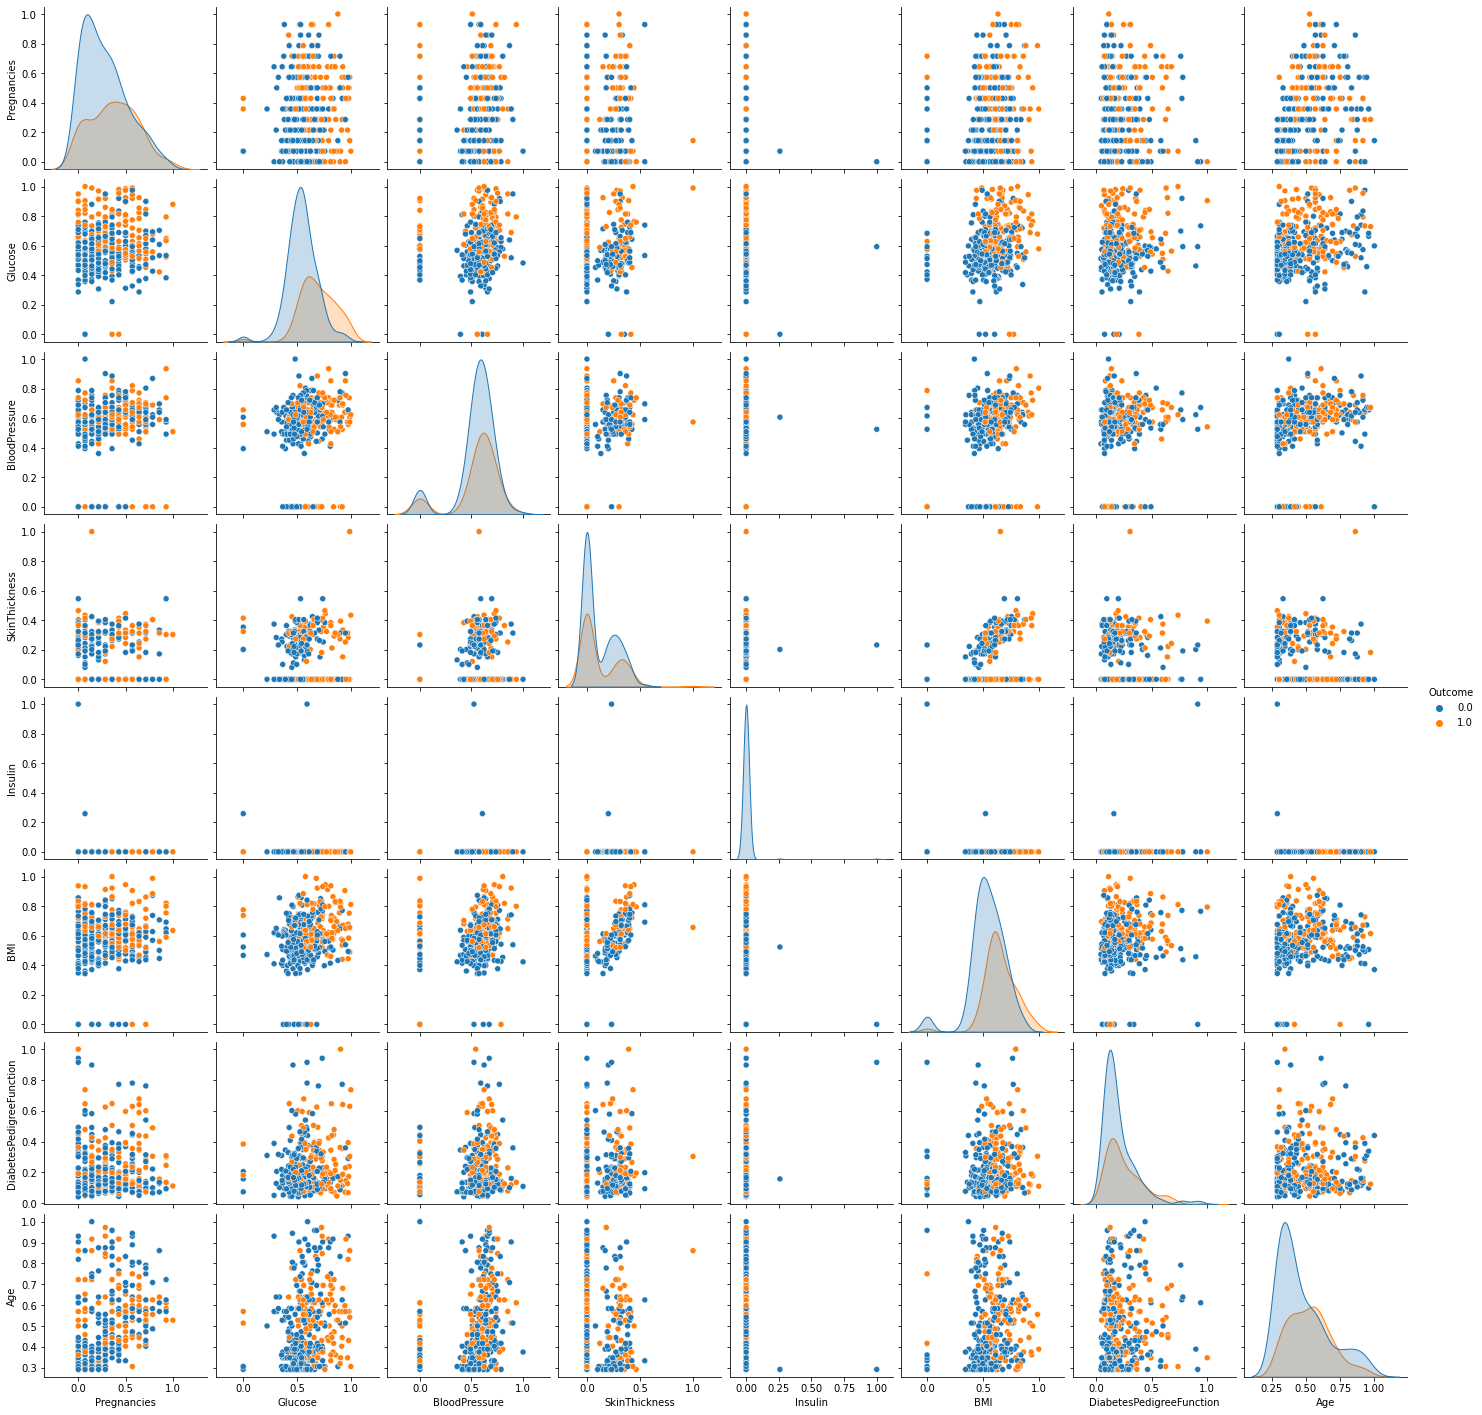

In [ ]:
#Pairplot

sns.pairplot(missing_data_frame, hue="Outcome", vars=["Pregnancies","Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction","Age"])
plt.show()

We will examine correlation heat maps for both the full and missing dataframes (in that order) to see if any features are correlated.

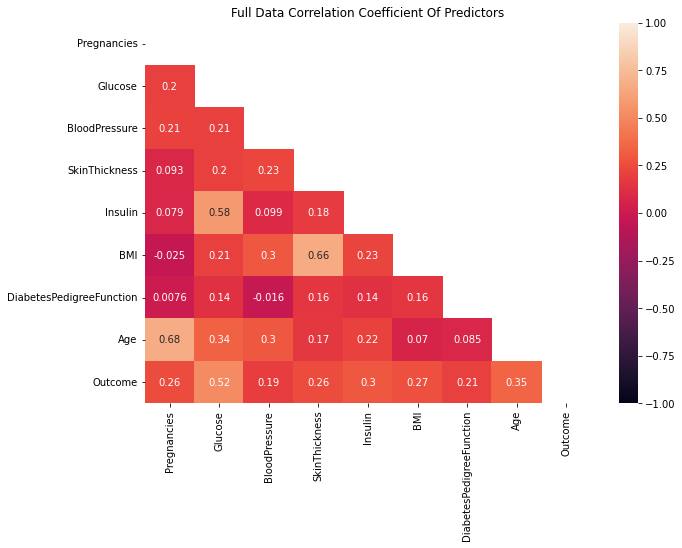

In [ ]:
#Correlation Heat Map
#Full Data

#set figure size
plt.figure(figsize=(10,7))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(data_frame.corr(), dtype=bool))

# generate heatmap
sns.heatmap(data_frame.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Full Data Correlation Coefficient Of Predictors')
plt.show()

#Change the colors

There are four correlations above 50%, however as there are none above 80%, all features will be used in this model. (If this project was focused moreso on prediction, I would be far more carful of correlation.)

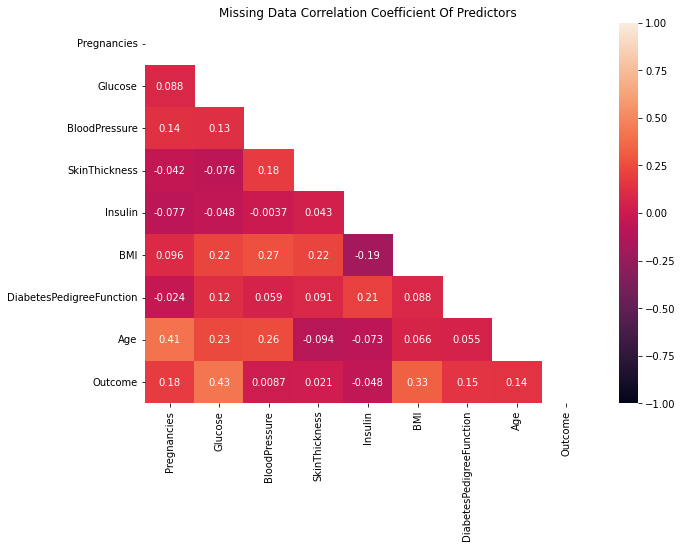

In [ ]:
#Correlation Heat Map
#Missing Data

#set figure size
plt.figure(figsize=(10,7))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(missing_data_frame.corr(), dtype=bool))

# generate heatmap
sns.heatmap(missing_data_frame.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Missing Data Correlation Coefficient Of Predictors')
plt.show()

#Change the colors

Intrestingly, unlike with the full data, there are no correlations above 50%

#Part Three: Feature Selection

In [ ]:
# label encoding
X = data_frame.drop(["Outcome"], axis=1)
y = data_frame["Outcome"]

A = missing_data_frame.drop(["Outcome"], axis=1)
b = missing_data_frame["Outcome"]

In [ ]:
#Train Test Split
#Full Data
from sklearn.model_selection import train_test_split

#This produces a 70/30 split in the data. 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

#Missing Data
A_train,A_test,b_train,b_test=train_test_split(A,b,test_size=0.30,random_state=42)


In [ ]:
#Logistic Lasso Regression

#Model One: Trained with full data and tested with full data at a 70/30 split.
from sklearn.linear_model import LogisticRegression
full = LogisticRegression(penalty="l1", solver='liblinear')
full.fit(X_train,y_train) #We are training our model
print("Model One accuracy of Lasso Regression Classifier: {}".format(full.score(X_test,y_test)))
full_acc_score = full.score(X_test,y_test)

#Model Two: Trained with full data and tested with missing data at an 100/100 split.
from sklearn.linear_model import LogisticRegression
pessimist = LogisticRegression(penalty='l1', solver='liblinear')
pessimist.fit(X,y) #We are training our model
print("Model two accuracy of Lasso Regression Classifier: {}".format(pessimist.score(A,b)))
pessimist_acc_score = pessimist.score(A,b)

#Model Three: Trained with missing data and tested with missing data at a 70/30 split.
empty = LogisticRegression(penalty='l1', solver='liblinear')
empty.fit(A_train,b_train) #We are training our model
print("Model Three accuracy of Lasso Regression Classifier: {}".format(empty.score(A_test,b_test)))
empty_acc_score = empty.score(A_test,b_test)

#Model Four: Trained with missing data and tested with full data at an 100/100 split.
from sklearn.linear_model import LogisticRegression
optimist = LogisticRegression(penalty='l1', solver='liblinear')
optimist.fit(A,b) #We are training our model
print("Model Four accuracy of Lasso Regression Classifier: {}".format(optimist.score(X,y)))
optimist_acc_score = optimist.score(X,y)

#rework on the tags 

Model One accuracy of Lasso Regression Classifier: 0.7627118644067796
Model two accuracy of Lasso Regression Classifier: 0.7393617021276596
Model Three accuracy of Lasso Regression Classifier: 0.7168141592920354
Model Four accuracy of Lasso Regression Classifier: 0.7678571428571429


In [ ]:
model_ev = pd.DataFrame({'Model': ["Model One", "Model Two", 'Model Three', 'Model Four'], 
                         'Accuracy': [full_acc_score*100, pessimist_acc_score*100, empty_acc_score*100, optimist_acc_score*100]})
model_ev

,Model,Accuracy
0,Model One,76.271186
1,Model Two,73.936170
2,Model Three,71.681416
3,Model Four,76.785714


Some Closing Observations:

(1) Model One outperformed better than Model Three (76.27 vs 71.68). Model One was trained and tested with full data at a 70/30 split. Model Three was trained and tested with missing data at a 70/30 split.

(2) Model One an Model Four were both tested on full data and outperformed 
Model Two and Model Four, which were both tested on missing data.

(3) Model Four, which was trained on missing data and tested with full data outperfomrned all other models. However, Model four only bearly outperformed One by about half of one percent. Meaning that the result is likely not statistically significant

(4) There is no easy conclusion to draw, especially because the example is illustrative, however, it appers that full data can improve the accuracy of models both when used in training and in testing. However, I imgine this is only true, if and only if, the underlying model is still strong from the start.  